C:\Users\kubra\AppData\Local\Temp\ipykernel_17336\4098522994.py:9: DeprecationWarning: scipy.misc.electrocardiogram has been deprecated in SciPy v1.10.0; and will be completely removed in SciPy v1.12.0. Dataset methods have moved into the scipy.datasets module. Use scipy.datasets.electrocardiogram instead.
  ecg = electrocardiogram()


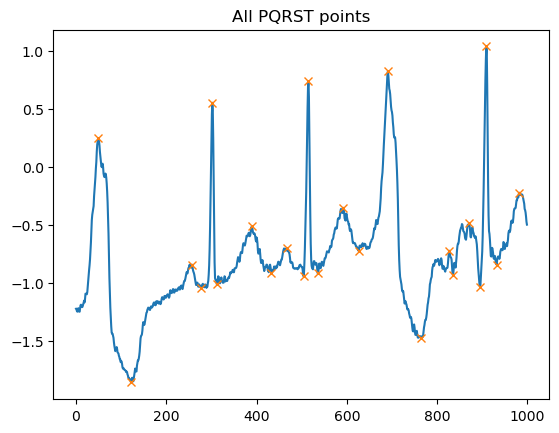

PQ interval: 0.20 s
QR interval: 0.38 s
RS interval: 0.06 s
ST interval: 0.07 s
PT interval: 0.70 s
PP interval: 0.73 s
QQ interval: 0.74 s
TP interval: 0.22 s


In [54]:
#Name - Surname : Kübra Uçar
#Student Number : 191805067

from scipy.misc import electrocardiogram
import matplotlib.pyplot as plt
import numpy as np
from scipy.signal import find_peaks

ecg = electrocardiogram()

#sampling frequency 360Hz
fs = 360

#lower and upper index for investigation
lower=17000
upper=18000

# get specific range of ecg signal
x = ecg[lower:upper]
sampling_rate = 1 / fs

####ALL PRT points
p_allPRT, p_allPRTproperties = find_peaks(x, prominence=[0.2],distance=30)

####ALL QS points
p_allQS, p_allQRproperties = find_peaks(x*(-1), prominence=[0.1],distance=30)

####ALL PQRST points
p_allPQRST = np.concatenate((p_allPRT,p_allQS))
p_allPQRST.sort(kind='mergesort')
plt.figure()
plt.title("All PQRST points")
plt.plot(x)
plt.plot(p_allPQRST, x[p_allPQRST], "x")
plt.show()

#the time intervals of the following intervals In the same block: PQ, QR, RS, ST, PT

pq_interval = (p_allPQRST[1] - p_allPQRST[0])*sampling_rate
qr_interval = (p_allPQRST[2]- p_allPQRST[1])*sampling_rate
rs_interval = (p_allPQRST[3]-p_allPQRST[2])*sampling_rate
st_interval = (p_allPQRST[4]-p_allPQRST[3])*sampling_rate
pt_interval = (p_allPQRST[4]-p_allPQRST[0])*sampling_rate

#the time intervals of the following intervals In sequential blocks: PP, QQ, TP
pp_interval =(p_allPQRST[5]-p_allPQRST[0]) *sampling_rate
qq_interval = (p_allPQRST[6]-p_allPQRST[1])*sampling_rate
tp_interval = (p_allPQRST[6]-p_allPQRST[5])*sampling_rate

print(f"PQ interval: {pq_interval:.2f} s")
print(f"QR interval: {qr_interval:.2f} s")
print(f"RS interval: {rs_interval:.2f} s")
print(f"ST interval: {st_interval:.2f} s")
print(f"PT interval: {pt_interval:.2f} s")
print(f"PP interval: {pp_interval:.2f} s")
print(f"QQ interval: {qq_interval:.2f} s")
print(f"TP interval: {tp_interval:.2f} s")